In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv("MarketSales.csv")

/var/folders/hz/hhcwj2sd1pq_fr0ynsft46400000gn/T/ipykernel_5244/714094261.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("MarketSales.csv")


In [3]:
df.isnull().sum()

ID                     1
ITEMCODE            7167
ITEMNAME            7167
FICHENO                0
DATE_                  1
AMOUNT                 1
PRICE                  1
LINENETTOTAL           1
LINENET                1
BRANCHNR               1
BRANCH                 1
SALESMAN               0
CITY                   1
REGION                 1
LATITUDE               1
LONGITUDE              1
CLIENTCODE         18348
CLIENTNAME         18365
BRANDCODE          35557
BRAND              35557
CATEGORY_NAME1      7167
CATEGORY_NAME2     27660
CATEGORY_NAME3    209459
STARTDATE              0
ENDDATE                0
GENDER             18365
dtype: int64

In [4]:
df.drop('CATEGORY_NAME3', axis=1, inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

ID                0
ITEMCODE          0
ITEMNAME          0
FICHENO           0
DATE_             0
AMOUNT            0
PRICE             0
LINENETTOTAL      0
LINENET           0
BRANCHNR          0
BRANCH            0
SALESMAN          0
CITY              0
REGION            0
LATITUDE          0
LONGITUDE         0
CLIENTCODE        0
CLIENTNAME        0
BRANDCODE         0
BRAND             0
CATEGORY_NAME1    0
CATEGORY_NAME2    0
STARTDATE         0
ENDDATE           0
GENDER            0
dtype: int64

In [6]:
# BRAND sütununda ÜLKER markasını filtreleme
ulker_df = df[df['BRAND'] == 'ÜLKER']

# CATEGORY_NAME1 sütunundaki benzersiz kategorileri elde etme
category_name1_unique = ulker_df['CATEGORY_NAME1'].unique()

# Her CATEGORY_NAME1 kategorisi için benzersiz CATEGORY_NAME2 kategorilerini yazdırma
for category in category_name1_unique:
    category_name2_unique = ulker_df[ulker_df['CATEGORY_NAME1'] == category]['CATEGORY_NAME2'].unique()
    print(f"{category} kategorisinde bulunan CATEGORY_NAME2 kategorileri:")
    for subcategory in category_name2_unique:
        print(f" - {subcategory}")
    print()  # Boş satır ekleyerek çıktıyı daha okunabilir hale getirme

SÜT KAHVALTILIK kategorisinde bulunan CATEGORY_NAME2 kategorileri:
 - KAHVALTILIK
 - TEREYAĞ MARGARİN

GIDA kategorisinde bulunan CATEGORY_NAME2 kategorileri:
 - ÇİKOLATA GOFRET
 - HAZIR YEMEKLER
 - BAKLİYAT
 - BÜSKİVİ ÇEREZ
 - UNLU MAMÜLLER
 - CORBA BULYON
 - SAKIZ SEKERLEME
 - MAKARNA
 - SIVI YAĞLAR
 - BAYRAMLIK
 - TUZ BAHARAT
 - ÇİKOLATA

İÇECEK kategorisinde bulunan CATEGORY_NAME2 kategorileri:
 - GAZLI İÇECEK
 - ÇAY KAHVE
 - GAZSIZ İÇECEK
 - SU MADENSUYU

KOZMETİK kategorisinde bulunan CATEGORY_NAME2 kategorileri:
 - DUŞ BANYO
 - SAÇ BAKIM

BEBEK kategorisinde bulunan CATEGORY_NAME2 kategorileri:
 - HAZIR YEMEK MAMA
 - BEBEK BAKIM
 - ÇOCUK BEZLERİ

KAĞIT kategorisinde bulunan CATEGORY_NAME2 kategorileri:
 - ISLAK MENDİL HAVLU
 - HİJYENİK PEDLER

EV kategorisinde bulunan CATEGORY_NAME2 kategorileri:
 - MUTFAK EŞYA GEREÇLERİ
 - ELEKTRONİK



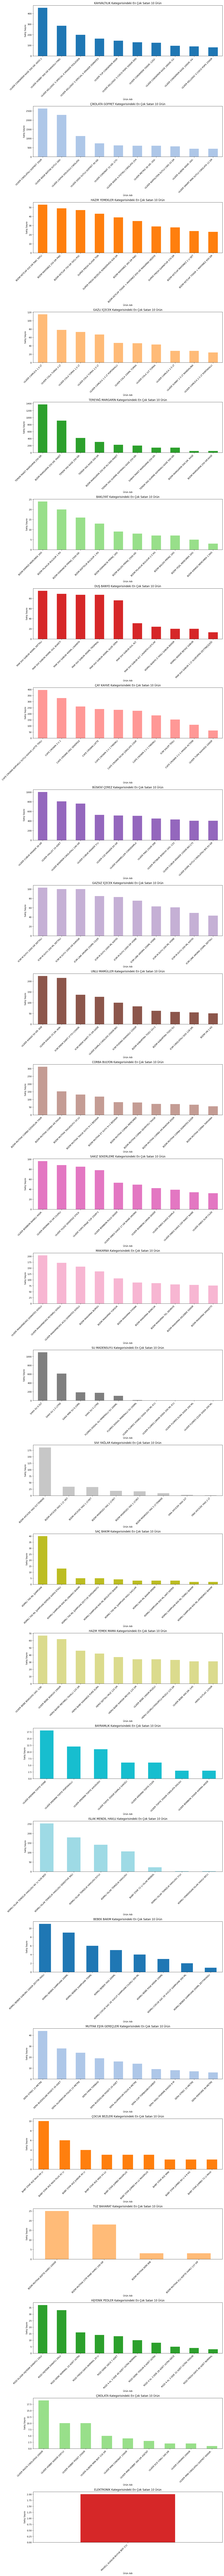

In [26]:

# ÜLKER markasını filtreleme
ulker_df = df[df['BRAND'] == 'ÜLKER']

# Kategorilere göre en çok satan 10 ürünü belirleme
categories = ulker_df['CATEGORY_NAME2'].unique()

# Subplot sayısını ayarlama
n_categories = len(categories)
fig, axes = plt.subplots(n_categories, 1, figsize=(14, 6 * n_categories), constrained_layout=True)

# Her kategori için en çok satan 10 ürünü hesaplama ve grafiği oluşturma
for i, category in enumerate(categories):
    category_df = ulker_df[ulker_df['CATEGORY_NAME2'] == category]
    top_items = category_df['ITEMNAME'].value_counts().head(10)
    
    ax = axes[i] if n_categories > 1 else axes
    top_items.plot(kind='bar', ax=ax, color=plt.cm.tab20.colors[i % 20])
    ax.set_title(f'{category} Kategorisindeki En Çok Satan 10 Ürün')
    ax.set_xlabel('Ürün Adı')
    ax.set_ylabel('Satış Sayısı')
    ax.set_xticklabels(top_items.index, rotation=45, ha='right')

plt.show()

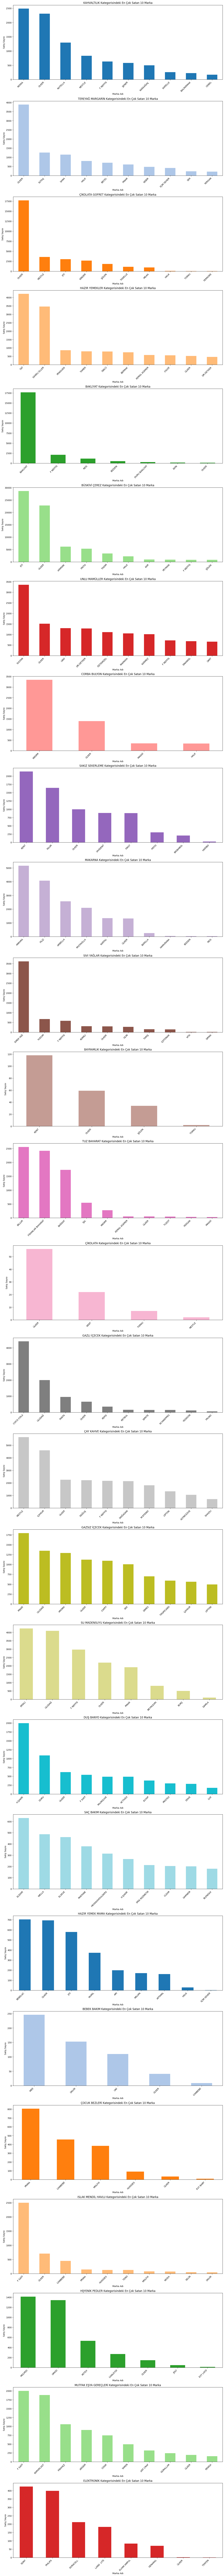

In [32]:
# İncelemek istediğiniz CATEGORY_NAME2 kategorilerinin listesi
categories_to_plot = [
    'KAHVALTILIK', 'TEREYAĞ MARGARİN', 'ÇİKOLATA GOFRET', 'HAZIR YEMEKLER', 'BAKLİYAT', 
    'BÜSKİVİ ÇEREZ', 'UNLU MAMÜLLER', 'CORBA BULYON', 'SAKIZ SEKERLEME', 'MAKARNA', 
    'SIVI YAĞLAR', 'BAYRAMLIK', 'TUZ BAHARAT', 'ÇİKOLATA', 'GAZLI İÇECEK', 'ÇAY KAHVE', 
    'GAZSIZ İÇECEK', 'SU MADENSUYU', 'DUŞ BANYO', 'SAÇ BAKIM', 'HAZIR YEMEK MAMA', 
    'BEBEK BAKIM', 'ÇOCUK BEZLERİ', 'ISLAK MENDİL HAVLU', 'HİJYENİK PEDLER', 
    'MUTFAK EŞYA GEREÇLERİ', 'ELEKTRONİK'
]

# Subplot sayısını ayarlama
n_categories = len(categories_to_plot)
fig, axes = plt.subplots(n_categories, 1, figsize=(14, 6 * n_categories), constrained_layout=True)

# Her kategori için en çok satan 10 markayı hesaplama ve grafiği oluşturma
for i, category in enumerate(categories_to_plot):
    category_df = df[df['CATEGORY_NAME2'] == category]
    top_brands = category_df['BRAND'].value_counts().head(10)
    
    ax = axes[i] if n_categories > 1 else axes
    top_brands.plot(kind='bar', ax=ax, color=plt.cm.tab20.colors[i % 20])
    ax.set_title(f'{category} Kategorisindeki En Çok Satan 10 Marka')
    ax.set_xlabel('Marka Adı')
    ax.set_ylabel('Satış Sayısı')
    ax.set_xticklabels(top_brands.index, rotation=45, ha='right')

plt.show()

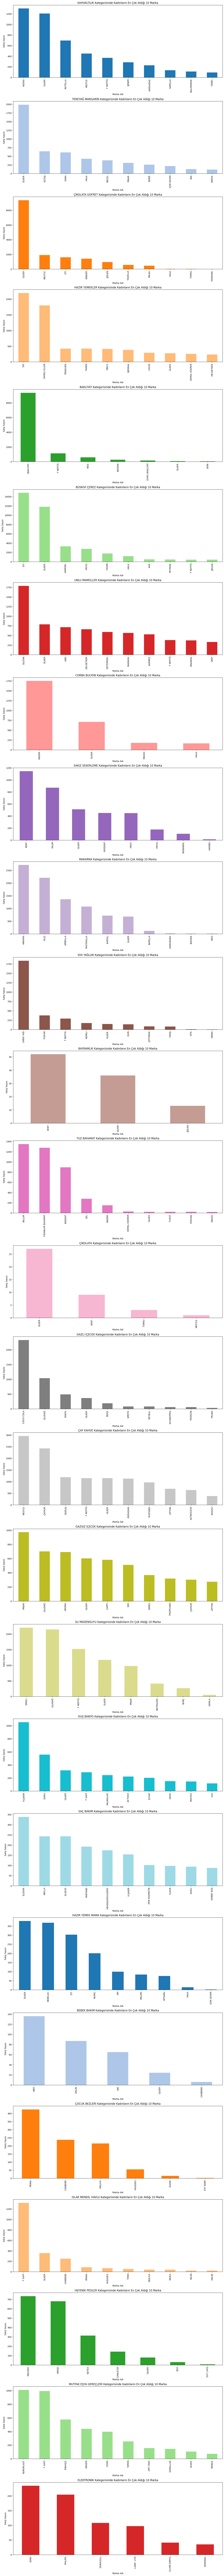

In [7]:

# İlgili kategorilerin listesi
categories_to_analyze = [
    'KAHVALTILIK', 'TEREYAĞ MARGARİN', 'ÇİKOLATA GOFRET', 'HAZIR YEMEKLER', 'BAKLİYAT', 
    'BÜSKİVİ ÇEREZ', 'UNLU MAMÜLLER', 'CORBA BULYON', 'SAKIZ SEKERLEME', 'MAKARNA', 
    'SIVI YAĞLAR', 'BAYRAMLIK', 'TUZ BAHARAT', 'ÇİKOLATA', 'GAZLI İÇECEK', 'ÇAY KAHVE', 
    'GAZSIZ İÇECEK', 'SU MADENSUYU', 'DUŞ BANYO', 'SAÇ BAKIM', 'HAZIR YEMEK MAMA', 
    'BEBEK BAKIM', 'ÇOCUK BEZLERİ', 'ISLAK MENDİL HAVLU', 'HİJYENİK PEDLER', 
    'MUTFAK EŞYA GEREÇLERİ', 'ELEKTRONİK'
]

# Subplot ayarları
n_categories = len(categories_to_analyze)
fig, axes = plt.subplots(n_categories, 1, figsize=(14, 6 * n_categories), constrained_layout=True)

# Her kategori için "K" cinsiyetinin en çok aldığı 10 markanın grafiğini çizme
for i, category in enumerate(categories_to_analyze):
    category_df = df[(df['CATEGORY_NAME2'] == category) & (df['GENDER'] == 'K')]
    top_brands = category_df['BRAND'].value_counts().head(10)
    
    ax = axes[i] if n_categories > 1 else axes
    top_brands.plot(kind='bar', ax=ax, color=plt.cm.tab20.colors[i % 20])
    ax.set_title(f'{category} Kategorisinde Kadınların En Çok Aldığı 10 Marka')
    ax.set_xlabel('Marka Adı')
    ax.set_ylabel('Satış Sayısı')

plt.show()


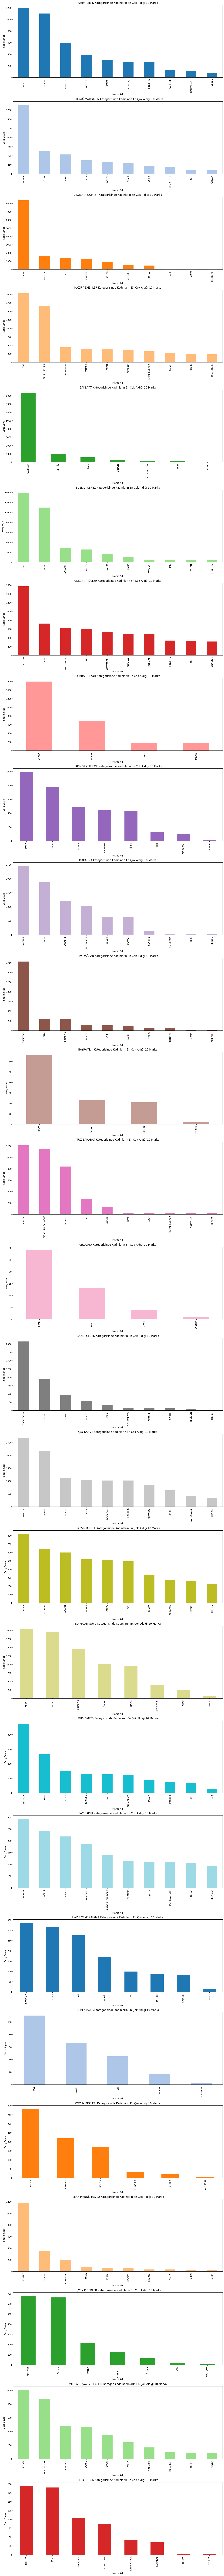

In [9]:
# İlgili kategorilerin listesi
categories_to_analyze = [
    'KAHVALTILIK', 'TEREYAĞ MARGARİN', 'ÇİKOLATA GOFRET', 'HAZIR YEMEKLER', 'BAKLİYAT', 
    'BÜSKİVİ ÇEREZ', 'UNLU MAMÜLLER', 'CORBA BULYON', 'SAKIZ SEKERLEME', 'MAKARNA', 
    'SIVI YAĞLAR', 'BAYRAMLIK', 'TUZ BAHARAT', 'ÇİKOLATA', 'GAZLI İÇECEK', 'ÇAY KAHVE', 
    'GAZSIZ İÇECEK', 'SU MADENSUYU', 'DUŞ BANYO', 'SAÇ BAKIM', 'HAZIR YEMEK MAMA', 
    'BEBEK BAKIM', 'ÇOCUK BEZLERİ', 'ISLAK MENDİL HAVLU', 'HİJYENİK PEDLER', 
    'MUTFAK EŞYA GEREÇLERİ', 'ELEKTRONİK'
]

# Subplot ayarları
n_categories = len(categories_to_analyze)
fig, axes = plt.subplots(n_categories, 1, figsize=(14, 6 * n_categories), constrained_layout=True)

# Her kategori için "E" cinsiyetinin en çok aldığı 10 markanın grafiğini çizme
for i, category in enumerate(categories_to_analyze):
    category_df = df[(df['CATEGORY_NAME2'] == category) & (df['GENDER'] == 'E')]
    top_brands = category_df['BRAND'].value_counts().head(10)
    
    ax = axes[i] if n_categories > 1 else axes
    top_brands.plot(kind='bar', ax=ax, color=plt.cm.tab20.colors[i % 20])
    ax.set_title(f'{category} Kategorisinde Erkeklerin En Çok Aldığı 10 Marka')
    ax.set_xlabel('Marka Adı')
    ax.set_ylabel('Satış Sayısı')

plt.show()


In [44]:
# En çok satış yapılan kategorilerin listesi
top_categories = df['CATEGORY_NAME2'].value_counts().head(20)

print("En Çok Satış Yapılan Kategoriler:")
print(top_categories)

En Çok Satış Yapılan Kategoriler:
CATEGORY_NAME2
BÜSKİVİ ÇEREZ            74612
SEBZE                    63651
ÇİKOLATA GOFRET          30956
ÇAY KAHVE                25221
MEYVE                    23866
BAKLİYAT                 21936
SÜT                      16945
MAKARNA                  16907
SU MADENSUYU             16827
UNLU MAMÜLLER            15400
PEYNİR                   15239
HAZIR YEMEKLER           15071
GAZSIZ İÇECEK            11678
YUMURTA                  10445
TEREYAĞ MARGARİN         10086
KAHVALTILIK               9966
YOĞURT                    9248
GAZLI İÇECEK              8953
ÇAMAŞIR YIKAMA            8906
MUTFAK EŞYA GEREÇLERİ     8452
Name: count, dtype: int64


In [45]:
# ÜLKER markasının bulunduğu kategoriler
ulker_categories = df[df['BRAND'] == 'ÜLKER']['CATEGORY_NAME2'].unique()

# Tüm kategoriler
all_categories = df['CATEGORY_NAME2'].unique()

# ÜLKER markasının satış yapmadığı kategorileri belirleme
no_ulker_categories = [category for category in all_categories if category not in ulker_categories]

print("ÜLKER Markasının Satış Yapmadığı Kategoriler:")
print(no_ulker_categories)

ÜLKER Markasının Satış Yapmadığı Kategoriler:
['PEYNİR', 'SEBZE', 'TOZ TATLI', 'MEYVE', 'YUMURTA', 'TRAŞ MALZEMELERİ', 'ZEYTİN', 'ET ŞARKÜTERİ', 'KAĞIT PEÇETELER', 'WC KAĞITLARI', 'EV TEMİZLİK GEREÇLERİ', 'ÇAMAŞIR YIKAMA', 'DONDURULMUŞ GIDA', 'KÜMES HAYVANLARI', 'PARFÜM DEODORANT', 'YOĞURT', 'EV TEMİZLEYİCİ', 'AĞIZ BAKIM', 'MAKYAJ MALZEMELERİ', 'SÜT', 'VUCUT EL BAKIMI', 'GÜNLÜK İÇECEK', 'KIRMIZI ET', 'İÇ GİYİM AKSESUAR', 'SÜTLÜ TATLILAR DONDURMA', 'HAVLU KAĞITLARI', 'KAĞIT MENDİLLER', 'BULAŞIK YIKAMA', 'EV TEKSTİL', 'KUŞ MAMALARI', 'KEDİ MAMALARI', 'SAĞLIK', 'TERLİK', 'HASTA BAKIM ÜRÜNLERİ', 'KÖPEK MAMALARI', 'YÜZ BAKIMI']
